In [2]:
import itertools

# iterated weights share of the inheritance item list
inheritance = [8, 0.5, 3.5, 6, 1.2, 1.2, 1.2, 0.3, 0.6, 1, 2, 1]

# the total inheritance value
total_inherit = sum(inheritance)

# the target inheritance plan for each daughter
target_inherit = total_inherit / 3

# indexing the inheritance list
indices = list(range(len(inheritance)))

# initialize the minimum difference and the optimal partition
min_diff = float('inf')
opt_partition = None

# all possible combinations should be generated, considering the inheritance
# the given item list is not too long, the brute-force method is acceptable


def find_partitions():
    global min_diff, opt_partition
    for inheritance1_item in range(1, len(inheritance) - 1):
        for inheritance1_indices in itertools.combinations(indices, inheritance1_item):
            inheritance1 = [inheritance[i] for i in inheritance1_indices]
            sum_inheritance1 = sum(inheritance1)
            if abs(sum_inheritance1 - target_inherit) > min_diff:
                continue
            remaining_indices1 = list(set(indices) - set(inheritance1_indices))
            for inheritance2_size in range(1, len(remaining_indices1)):
                for inheritance2_indices in itertools.combinations(remaining_indices1, inheritance2_size):
                    inheritance2 = [inheritance[i] for i in inheritance2_indices]
                    sum_inheritance2 = sum(inheritance2)
                    inheritance3_indices = list(set(remaining_indices1) - set(inheritance2_indices))
                    inheritance3 = [inheritance[i] for i in inheritance3_indices]
                    sum_inheritance3 = sum(inheritance3)
                    sums_inheritance = [sum_inheritance1, sum_inheritance2, sum_inheritance3]
                    max_diff = max(sums_inheritance) - min(sums_inheritance)
                    if max_diff < min_diff:
                        min_diff = max_diff
                        opt_partition = (inheritance1, inheritance2, inheritance3)
                        if min_diff <= 0.1:
                            return


# output the result
find_partitions()

if opt_partition:
    inheritance1, inheritance2, inheritance3 = opt_partition
    print("the first share of the inheritance is：", inheritance1, "total value as：", sum(inheritance1))
    print("the second share of the inheritance is：", inheritance2, "total value as：", sum(inheritance2))
    print("the third share of the inheritance is：", inheritance3, "total value as：", sum(inheritance3))
    print("maximum difference between the inheritance partitions：", min_diff)
else:
    print("no optimal partition found")


the first share of the inheritance is： [8, 0.5, 0.3] total value as： 8.8
the second share of the inheritance is： [6, 1.2, 0.6, 1] total value as： 8.8
the third share of the inheritance is： [3.5, 1.2, 1.2, 2, 1] total value as： 8.9
maximum difference between the inheritance partitions： 0.09999999999999964


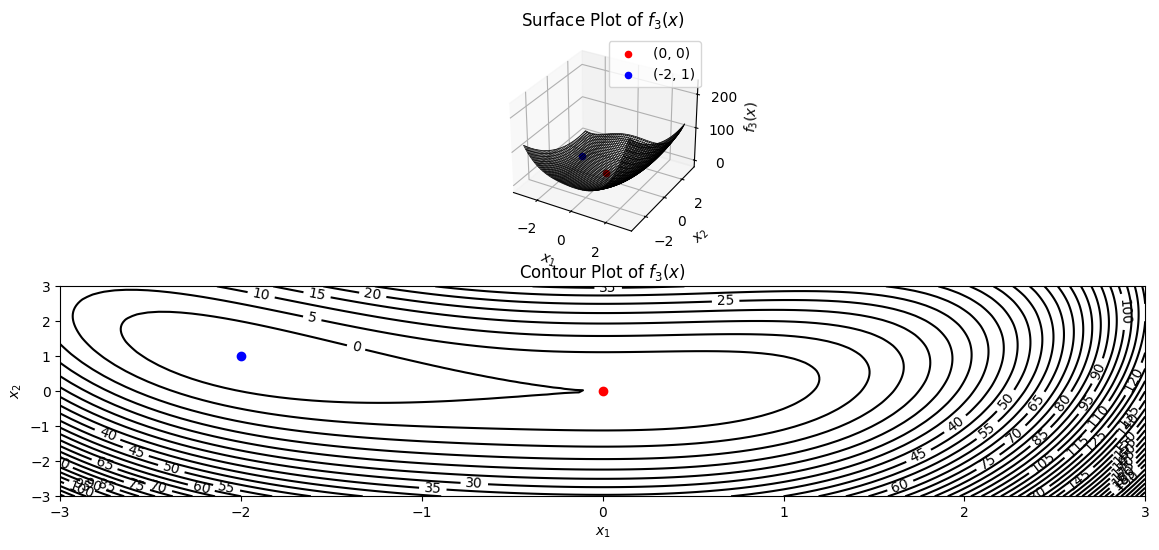

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# 定义函数
def f3(x1, x2):
    return x1 ** 4 + 2 * (x1 - x2) * x1 ** 2 + 4 * x2 ** 2


# 创建x1和x2的网格
x1 = np.linspace(-3, 3, 100)
x2 = np.linspace(-3, 3, 100)
X1, X2 = np.meshgrid(x1, x2)

# 计算函数值
Z = f3(X1, X2)

# 创建图形
fig = plt.figure(figsize=(14, 6))

# 绘制3D线框图（类似于等高线）
ax1 = fig.add_subplot(211, projection='3d')
ax1.plot_wireframe(X1, X2, Z, color='k', linewidth=0.5)
ax1.set_title('Surface Plot of $f_3(x)$')
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')
ax1.set_zlabel('$f_3(x)$')
ax1.scatter(0, 0, f3(0, 0), color='r', label='(0, 0)')
ax1.scatter(-2, 1, f3(-2, 1), color='b', label='(-2, 1)')
ax1.legend()

# 绘制等高线图
ax2 = fig.add_subplot(212)
contour = ax2.contour(X1, X2, Z, levels=50, colors='k')
ax2.set_title('Contour Plot of $f_3(x)$')
ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$')
ax2.scatter(0, 0, color='r')
ax2.scatter(-2, 1, color='b')
ax2.clabel(contour, inline=True, fontsize=10)  # 标注等高线的值

plt.show()